In [2]:
import pykx as kx

## Traffic

In [26]:
traffic_paths = ["data/09-2023.csv", "data/10-2023.csv", "data/11-2023.csv"]

In [27]:
def read_traffic(path):
    return kx.q.read.csv(path, "IPS  J S", ";", True)

In [28]:
traffic = kx.q.each(read_traffic, traffic_paths)

In [38]:
traffic

,id,fecha,tipo_elem,carga,error
,,,,,
0,1001i,2023.09.01D00:00:00.000000000,C30,0,N
1,1001i,2023.09.01D00:15:00.000000000,C30,0,N
2,1001i,2023.09.01D00:30:00.000000000,C30,0,N
3,1001i,2023.09.01D00:45:00.000000000,C30,0,N
4,1001i,2023.09.01D01:00:00.000000000,C30,0,N
5,1001i,2023.09.01D01:15:00.000000000,C30,0,N
6,1001i,2023.09.01D01:30:00.000000000,C30,0,N
7,1001i,2023.09.01D01:45:00.000000000,C30,0,N
8,1001i,2023.09.01D02:00:00.000000000,C30,0,N


In [29]:
traffic = kx.q.raze(traffic)

In [37]:
%%q
save `:traffic.csv

:traffic.csv


In [34]:
kx.q['traffic'] = traffic

In [35]:
%%q
save `$":data/traffic.csv"

:data/traffic.csv


In [45]:
kx.q['tr'] = traffic 

In [46]:
kx.q.sql("SELECT * FROM tr")

,id,fecha,tipo_elem,carga,error
,,,,,
0,1001i,2023.09.01D00:00:00.000000000,C30,0,N
1,1001i,2023.09.01D00:15:00.000000000,C30,0,N
2,1001i,2023.09.01D00:30:00.000000000,C30,0,N
3,1001i,2023.09.01D00:45:00.000000000,C30,0,N
4,1001i,2023.09.01D01:00:00.000000000,C30,0,N
5,1001i,2023.09.01D01:15:00.000000000,C30,0,N
6,1001i,2023.09.01D01:30:00.000000000,C30,0,N
7,1001i,2023.09.01D01:45:00.000000000,C30,0,N
8,1001i,2023.09.01D02:00:00.000000000,C30,0,N


In [42]:
kx.q('{select id:id,date:`date$fecha,time:`second$fecha,loadx:carga from x where error=`N}', traffic)

,id,date,time,loadx
,,,,
0,1001i,2023.09.01,00:00:00,0
1,1001i,2023.09.01,00:15:00,0
2,1001i,2023.09.01,00:30:00,0
3,1001i,2023.09.01,00:45:00,0
4,1001i,2023.09.01,01:00:00,0
5,1001i,2023.09.01,01:15:00,0
6,1001i,2023.09.01,01:30:00,0
7,1001i,2023.09.01,01:45:00,0
8,1001i,2023.09.01,02:00:00,0


In [47]:
traffic_ok = kx.q.qsql.select(traffic, columns={"id": "id", "date": "`date$fecha", "time": "`second$fecha", "loadx": "carga"}, where='error=`N')

In [50]:
traffic_mad = kx.q('{select avg loadx by date,time from x}', traffic_ok)

In [52]:
kx.q('{select from x where loadx=max loadx}', traffic_mad)

,,loadx
date,time,
2023.10.17,09:00:00,35.34387


## Weather

In [63]:
%%q
wm:{.Q.id("  II ***",(24*2)#"FS";enlist ";")0: x}
paths:(":data/sep_meteo23.csv";":data/oct_meteo23.csv";":data/nov_meteo23.csv")
weather:raze(wm')`$paths;
update FECHA:"D"$(raze')flip(ANO;MES;DIA) from `weather;
weather:`ESTACION`FECHA xcols `ANO`MES`DIA _ weather;
cw:cols[weather];
rest:(neg 2*24)_ cw;
tr:{(flip;enlist,cw where cw like x,"*")}
weather:ungroup?[
  weather;();0b;
  (rest,`HORA`VALOR`OK)!
    rest,((#;(count,`i);(enlist;(*;01:00;til,24)));tr"H";tr"V")]
delete from `weather where OK<>`V;
delete VALIDO from `weather;
mag:80 81 82 83 86 87 88 89!`ULTRAVIOLETA`VIENTO`DIRECCION`TEMPERATURA`HUMEDAD`PRESION`SOLAR`PRECIPITACION;
update mag MAGNITUD from `weather;
u:value mag;
weather:0!exec u#MAGNITUD!VALOR by FECHA,HORA,ESTACION from weather;
weather:lower[cols weather]xcol weather;
show weather

fecha      hora  estacion ultravioleta viento direccion temperatura humedad p..
-----------------------------------------------------------------------------..
2023.09.01 00:00 4                                      25.4                 ..
2023.09.01 00:00 8                                      23.3        34       ..
2023.09.01 00:00 16                                     23.5        33       ..
2023.09.01 00:00 18                                     24.7                 ..
2023.09.01 00:00 24                    0.78   145       23.7        29      9..
2023.09.01 00:00 35                                     26.5        26       ..
2023.09.01 00:00 36                                     23.6        30       ..
2023.09.01 00:00 38                                     26.1        26       ..
2023.09.01 00:00 39                                     22.1        43       ..
2023.09.01 00:00 54                    0.67   28        24.7        29       ..
2023.09.01 00:00 56                    0

In [65]:
%%q
meta weather

c            | t f a
-------------| -----
fecha        | d   p
hora         | u    
estacion     | i    
ultravioleta | f    
viento       | f    
direccion    | f    
temperatura  | f    
humedad      | f    
presion      | f    
solar        | f    
precipitacion| f    


In [64]:
%%q
save `weather.csv

:weather.csv


In [68]:
weather = kx.q.read.csv("data/weather.csv", "DUI       F", ",", True)

In [76]:
rain = kx.q.qsql.select(weather, columns={'precipitacion': 'avg precipitacion'}, where='not null precipitacion', by={'fecha': 'fecha', 'hora': 'hora'})

In [77]:
rain

pykx.KeyedTable(pykx.q('
fecha      hora | precipitacion
----------------| -------------
2023.09.01 00:00| 0            
2023.09.01 01:00| 0            
2023.09.01 02:00| 0            
2023.09.01 03:00| 0            
2023.09.01 04:00| 0            
2023.09.01 05:00| 0            
2023.09.01 06:00| 0            
2023.09.01 07:00| 0            
2023.09.01 08:00| 0            
2023.09.01 09:00| 0            
2023.09.01 10:00| 0            
2023.09.01 11:00| 0            
2023.09.01 12:00| 0            
2023.09.01 13:00| 0            
2023.09.01 14:00| 0            
2023.09.01 15:00| 0            
2023.09.01 16:00| 0            
2023.09.01 17:00| 0            
2023.09.01 18:00| 0            
2023.09.01 19:00| 0            
..
'))

In [80]:
rain

pykx.KeyedTable(pykx.q('
fecha      hora | precipitacion
----------------| -------------
2023.09.01 00:00| 0            
2023.09.01 01:00| 0            
2023.09.01 02:00| 0            
2023.09.01 03:00| 0            
2023.09.01 04:00| 0            
2023.09.01 05:00| 0            
2023.09.01 06:00| 0            
2023.09.01 07:00| 0            
2023.09.01 08:00| 0            
2023.09.01 09:00| 0            
2023.09.01 10:00| 0            
2023.09.01 11:00| 0            
2023.09.01 12:00| 0            
2023.09.01 13:00| 0            
2023.09.01 14:00| 0            
2023.09.01 15:00| 0            
2023.09.01 16:00| 0            
2023.09.01 17:00| 0            
2023.09.01 18:00| 0            
2023.09.01 19:00| 0            
..
'))

## All Together

In [81]:
traffic_avg

pykx.KeyedTable(pykx.q('
date       time    | loadx   
-------------------| --------
2023.09.01 00:00:00| 9.362745
2023.09.01 00:15:00| 8.817123
2023.09.01 00:30:00| 8.142922
2023.09.01 00:45:00| 7.22415 
2023.09.01 01:00:00| 6.466575
2023.09.01 01:15:00| 5.728852
2023.09.01 01:30:00| 5.140679
2023.09.01 01:45:00| 4.645333
2023.09.01 02:00:00| 4.1931  
2023.09.01 02:15:00| 4.029851
2023.09.01 02:30:00| 3.571328
2023.09.01 02:45:00| 3.456374
2023.09.01 03:00:00| 3.254241
2023.09.01 03:15:00| 3.07845 
2023.09.01 03:30:00| 2.97201 
2023.09.01 03:45:00| 3.007483
2023.09.01 04:00:00| 2.834898
2023.09.01 04:15:00| 2.85967 
2023.09.01 04:30:00| 2.789335
2023.09.01 04:45:00| 2.886124
..
'))

In [83]:
rain

pykx.KeyedTable(pykx.q('
fecha      hora | precipitacion
----------------| -------------
2023.09.01 00:00| 0            
2023.09.01 01:00| 0            
2023.09.01 02:00| 0            
2023.09.01 03:00| 0            
2023.09.01 04:00| 0            
2023.09.01 05:00| 0            
2023.09.01 06:00| 0            
2023.09.01 07:00| 0            
2023.09.01 08:00| 0            
2023.09.01 09:00| 0            
2023.09.01 10:00| 0            
2023.09.01 11:00| 0            
2023.09.01 12:00| 0            
2023.09.01 13:00| 0            
2023.09.01 14:00| 0            
2023.09.01 15:00| 0            
2023.09.01 16:00| 0            
2023.09.01 17:00| 0            
2023.09.01 18:00| 0            
2023.09.01 19:00| 0            
..
'))

In [92]:
traffic_mad = kx.q('{0!x}', traffic_avg)
rain_mad = kx.q('{0!x}', rain)

In [94]:
traffic_mad

,date,time,loadx
,,,
0,2023.09.01,00:00:00,9.362745
1,2023.09.01,00:15:00,8.817123
2,2023.09.01,00:30:00,8.142922
3,2023.09.01,00:45:00,7.22415
4,2023.09.01,01:00:00,6.466575
5,2023.09.01,01:15:00,5.728852
6,2023.09.01,01:30:00,5.140679
7,2023.09.01,01:45:00,4.645333
8,2023.09.01,02:00:00,4.1931


In [101]:
rain_mad = kx.q.xcol(kx.SymbolVector(['date', 'time']), rain_mad)

In [107]:
rain_mad = kx.q('{update `second$time from x}', rain_mad)

In [109]:
all_mad = kx.q.aj(kx.SymbolVector(['date', 'time']), traffic_mad, rain_mad)

In [103]:
traffic_mad

,date,time,loadx
,,,
0,2023.09.01,00:00:00,9.362745
1,2023.09.01,00:15:00,8.817123
2,2023.09.01,00:30:00,8.142922
3,2023.09.01,00:45:00,7.22415
4,2023.09.01,01:00:00,6.466575
5,2023.09.01,01:15:00,5.728852
6,2023.09.01,01:30:00,5.140679
7,2023.09.01,01:45:00,4.645333
8,2023.09.01,02:00:00,4.1931


In [113]:
all_mad = kx.q.xcols(kx.SymbolVector(['date', 'time', 'precipitacion']), all_mad)

pykx.LongAtom(pykx.q('8736'))

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [119]:
X = all_mad[['time', 'precipitacion']]
y = all_mad['loadx']

In [123]:
X = kx.q('{update `int$time from x}', X)

In [126]:
X = X.pd()
y = y.pd()

In [127]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [129]:
X_normalized

array([[0.        , 0.        ],
       [0.01052632, 0.        ],
       [0.02105263, 0.        ],
       ...,
       [0.97894737, 0.16682578],
       [0.98947368, 0.16682578],
       [1.        , 0.16682578]])

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [131]:
model = LinearRegression()

In [132]:
model.fit(X_train, y_train)

LinearRegression()

In [133]:
predictions = model.predict(X_test)

In [135]:
import matplotlib.pyplot as plt

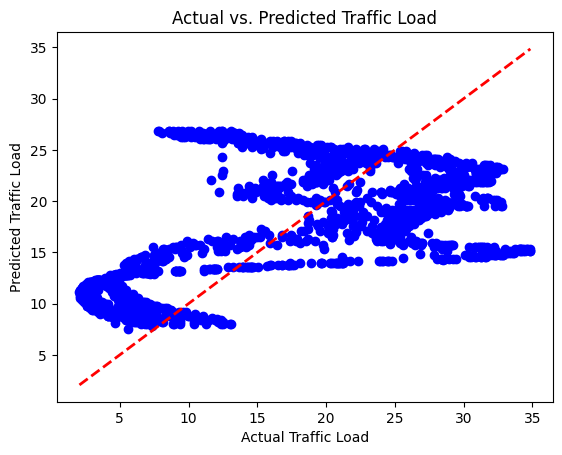

In [136]:
plt.scatter(y_test, predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for reference
plt.xlabel('Actual Traffic Load')
plt.ylabel('Predicted Traffic Load')
plt.title('Actual vs. Predicted Traffic Load')
plt.show()

In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
predictions = model.predict(X_test)

2024-01-25 18:09:01.237811: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
219/219 [==============================] - 1s 1ms/step - loss: 238.8047 - val_loss: 69.7713
Epoch 2/50
219/219 [==============================] - 0s 931us/step - loss: 68.6930 - val_loss: 61.8298
Epoch 3/50
219/219 [==============================] - 0s 907us/step - loss: 61.6430 - val_loss: 55.0749
Epoch 4/50
219/219 [==============================] - 0s 962us/step - loss: 56.6387 - val_loss: 51.0145
Epoch 5/50
219/219 [==============================] - 0s 957us/step - loss: 52.4729 - val_loss: 47.9385
Epoch 6/50
219/219 [==============================] - 0s 910us/step - loss: 48.7537 - val_loss: 44.4319
Epoch 7/50
219/219 [==============================] - 0s 892us/step - loss: 45.4952 - val_loss: 42.3175
Epoch 8/50
219/219 [==============================] - 0s 966us/step - loss: 42.8528 - val_loss: 39.7655
Epoch 9/50
219/219 [==============================] - 0s 947us/step - loss: 40.5700 - val_loss: 37.7796
Epoch 10/50
219/219 [==============================] - 0s 928us/s

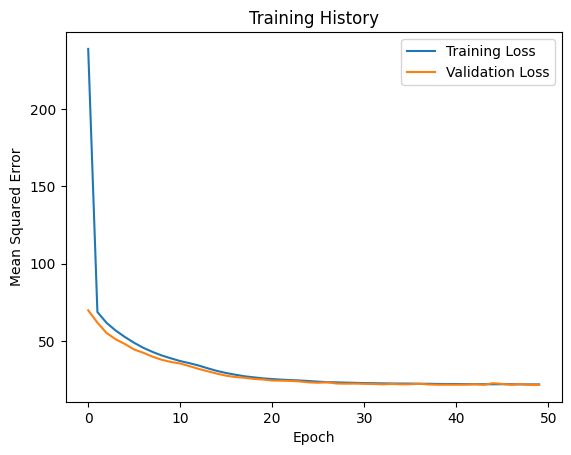

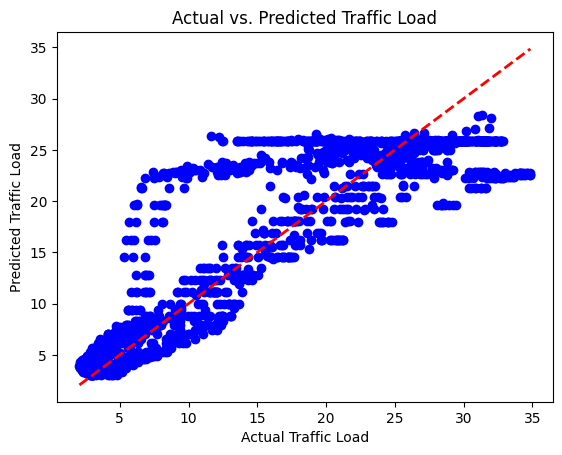

In [139]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training History')
plt.legend()
plt.show()

# Plot actual vs. predicted values
plt.scatter(y_test, predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for reference
plt.xlabel('Actual Traffic Load')
plt.ylabel('Predicted Traffic Load')
plt.title('Actual vs. Predicted Traffic Load')
plt.show()

In [140]:
X_test

array([[0.90526316, 0.        ],
       [0.76842105, 0.        ],
       [0.04210526, 0.        ],
       ...,
       [0.12631579, 0.        ],
       [0.85263158, 0.34188544],
       [0.14736842, 0.02004773]])

In [3]:
%%q
toMatrix:{({[t;i]value t[i]}[x;]')til count x:flip x}

In [25]:
%%q
x:([]a:1 2 3 4 5;b:til 5;c:`a`e`i`o`u)
value x[0]
/ ({[t;i]t[i]}[x]')til count x:flip x

1
0
`a


In [ ]:
for i in range(len(X_normalized) - sequence_length):
    X_sequence.append(X_normalized[i:i+sequence_length, :])
    y_sequence.append(y.iloc[i+sequence_length])